# Data Preprocessing III

This tutorial contains Python examples for data transformation, focusing on techniques for **sampling** and **data compression**. Follow the step-by-step instructions below carefully. To execute the code, click on the corresponding cell and press the SHIFT+ENTER keys simultaneously.

### Importing Libraries and Configuration

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pywt
from sklearn import datasets
%matplotlib inline
from matplotlib.pylab import rcParams


### Settings

In [ ]:
# Set the default figure size for matplotlib plots to 15 inches wide by 6 inches tall
rcParams["figure.figsize"] = (15, 6)

# Increase the default font size of the titles in matplotlib plots to extra-extra-large
rcParams["axes.titlesize"] = "xx-large"

# Make the titles of axes in matplotlib plots bold for better visibility
rcParams["axes.titleweight"] = "bold"

# Set the default location of the legend in matplotlib plots to the upper left corner
rcParams["legend.loc"] = "upper left"

# Configure pandas to display all columns of a DataFrame when printed to the console
pd.set_option('display.max_columns', None)

# Configure pandas to display all rows of a DataFrame when printed to the console
pd.set_option('display.max_rows', None)



### Sampling

Sampling plays a crucial role in both data reduction for exploratory analysis and scaling algorithms for big data applications, as well as in quantifying uncertainties stemming from diverse data distributions. There are several methods for sampling data, including sampling without replacement, where each chosen instance is removed from the dataset, preventing its reselection, and sampling with replacement, which allows each chosen instance to remain in the dataset, permitting its multiple selections within the sample.

In the upcoming example, we will demonstrate both sampling with and without replacement using the house_prices dataset.

In [ ]:
data = datasets.fetch_openml(name="house_prices", as_frame=True)
df = pd.DataFrame(data=data.data, columns=data.feature_names)
df['MedHouseVal'] = data.target
print('Number of samples = %d' % (df.shape[0]))
print('Number of attributes = %d' % (df.shape[1]))
display (df.head(n=10))

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


Number of samples = 1460
Number of attributes = 81


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MedHouseVal
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,None,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,None,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,None,None,None,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,None,None,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,None,None,None,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,Brk

In the following code, a sample of size 3 is randomly selected (without replacement) from the original data.

In [ ]:
sample = df.sample(n=3)
sample

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MedHouseVal
626,627,20,RL,NaN,12342,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1960,1978,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0,Unf,0,978,978,GasA,TA,Y,SBrkr,1422,0,0,1422,0,0,1,0,3,1,TA,6,Min1,1,TA,Attchd,1960.0,RFn,1,286,TA,TA,Y,0,0,36,0,0,0,None,GdWo,Shed,600,8,2007,WD,Normal,139900
499,500,20,RL,70.0,7535,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1958,1985,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,No,BLQ,111,LwQ,279,522,912,GasA,Fa,Y,SBrkr,912,0,0,912,0,1,1,0,2,1,TA,5,Typ,0,None,Attchd,1958.0,Fin,1,297,TA,TA,Y,12,285,0,0,0,0,None,MnWw,Shed,480,6,2007,WD,Normal,120000
550,551,120,RL,53.0,4043,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,TwnhsE,1Story,6,6,1977,1977,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,No,ALQ,559,Unf,0,510,1069,GasA,TA,Y,SBrkr,1069,0,0,1069,0,0,2,0,2,1,TA,4,Typ,0,None,Attchd,1977.0,RFn,2,440,TA,TA,Y,0,55,0,0,200,0,None,None,None,0,10,2008,COD,Abnorml,140000


In the next example, we randomly select 1% of the data (without replacement) and display the selected samples. The random_state argument of the function specifies the seed value of the random number generator.

In [ ]:
sample = df.sample(frac=0.01, random_state=1)
sample

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MedHouseVal
258,259,60,RL,80.0,12435,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2001,Gable,CompShg,VinylSd,VinylSd,BrkFace,172.0,Gd,TA,PConc,Gd,TA,No,GLQ,361,Unf,0,602,963,GasA,Ex,Y,SBrkr,963,829,0,1792,0,0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2001.0,RFn,2,564,TA,TA,Y,0,96,0,245,0,0,None,None,None,0,5,2008,WD,Normal,231500
267,268,75,RL,60.0,8400,Pave,None,Reg,Bnk,AllPub,Inside,Mod,SWISU,Norm,Norm,1Fam,2.5Fin,5,8,1939,1997,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,LwQ,378,Unf,0,342,720,GasA,Ex,Y,SBrkr,1052,720,420,2192,0,0,2,1,4,1,Gd,8,Typ,1,Gd,Detchd,1939.0,Unf,1,240,TA,TA,Y,262,24,0,0,0,0,None,None,None,0,7,2008,WD,Normal,179500
288,289,20,RL,NaN,9819,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,5,5,1967,1967,Gable,CompShg,MetalSd,MetalSd,BrkFace,31.0,TA,Gd,CBlock,TA,TA,No,BLQ,450,Unf,0,432,882,GasA,TA,Y,SBrkr,900,0,0,900,0,0,1,0,3,1,TA,5,Typ,0,None,Detchd,1970.0,Unf,1,280,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,122000
649,650,180,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,SFoyer,4,6,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,Gd,TA,Av,BLQ,131,GLQ,499,0,630,GasA,Gd,Y,SBrkr,630,0,0,630,1,0,1,0,1,1,TA,3,Typ,0,None,None,NaN,None,0,0,None,None,Y,0,0,0,0,0,0,None,MnPrv,None,0,12,2007,WD,Normal,84500
1233,1234,20,RL,NaN,12160,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,Plywood,Plywood,BrkFace,180.0,TA,TA,CBlock,TA,TA,No,Rec,1000,Unf,0,188,1188,GasA,Fa,Y,SBrkr,1188,0,0,1188,1,0,1,0,3,1,TA,6,Typ,0,None,Attchd,1959.0,RFn,2,531,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,5,2010,COD,Abnorml,142000
167,168,60,RL,86.0,10562,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,Stone,300.0,Gd,TA,PConc,Ex,TA,No,GLQ,1288,Unf,0,294,1582,GasA,Ex,Y,SBrkr,1610,551,0,2161,1,0,1,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3,789,TA,TA,Y,178,120,0,0,0,0,None,None,None,0,11,2007,New,Partial,325624
926,927,60,RL,93.0,11999,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2003,2004,Hip,CompShg,VinylSd,VinylSd,BrkFace,340.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1181,1181,GasA,Ex,Y,SBrkr,1234,1140,0,2374,0,0,2,1,4,1,Ex,10,Typ,1,Gd,BuiltIn,2003.0,Fin,3,656,TA,TA,Y,104,100,0,0,0,0,None,None,None,0,5,2007,WD,Normal,285000
831,832,160,FV,30.0,3180,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,2Story,7,5,2005,2005,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,600,600,GasA,Ex,Y,SBrkr,520,600,80,1200,0,0,2,1,2,1,Gd,4,Typ,0,None,Detchd,2005.0,RFn,2,480,TA,TA,Y,0,166,0,0,0,0,None,None,None,0,6,2006,WD,Normal,151000
1237,1238,60,RL,41.0,12393,Pave,None,IR2,Lvl,AllPub,FR2,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,847,847,GasA,Ex,Y,SBrkr,847,1101,0,1948,0,0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2004.0,Fin,2,434,TA,TA,Y,100,48,0,0,0,0,None,None,None,0,9,2006,WD,Normal,195000
426,427,80,RL,NaN,12800,Pave,None,Reg,Low,AllPub,Inside,Mod,SawyerW,Norm,Norm,1Fam,SLvl,7,5,1989,1989,Gable,CompShg,Wd Sdng,Wd S

Finally, we perform a sampling with replacement to create a sample whose size is equal to 1% of the entire data. You should be able to observe duplicate instances in the sample by increasing the sample size.

In [ ]:
sample = df.sample(frac=0.01, replace=True, random_state=1)
sample

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,MedHouseVal
1061,1062,30,C (all),120.0,18000,Grvl,None,Reg,Low,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,3,4,1935,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0,Unf,0,894,894,GasA,TA,Y,SBrkr,894,0,0,894,0,0,1,0,2,1,TA,6,Typ,0,None,Detchd,1994.0,RFn,3,1248,TA,TA,Y,0,20,0,0,0,0,None,None,Shed,560,8,2008,ConLD,Normal,81000
235,236,160,RM,21.0,1680,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,TwnhsE,2Story,6,3,1971,1971,Gable,CompShg,HdBoard,HdBoard,BrkFace,604.0,TA,TA,CBlock,TA,TA,No,ALQ,358,Unf,0,125,483,GasA,TA,Y,SBrkr,483,504,0,987,0,0,1,1,2,1,TA,5,Typ,0,None,Detchd,1971.0,Unf,1,264,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,8,2008,WD,Normal,89500
1096,1097,70,RM,60.0,6882,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,6,7,1914,2006,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,684,684,GasA,TA,Y,SBrkr,773,582,0,1355,0,0,1,1,3,1,Gd,7,Typ,0,None,None,NaN,None,0,0,None,None,Y,136,0,115,0,0,0,None,None,None,0,3,2007,WD,Normal,127000
905,906,20,RL,80.0,9920,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1954,1954,Gable,CompShg,HdBoard,HdBoard,Stone,110.0,TA,TA,CBlock,TA,TA,No,Rec,354,LwQ,290,412,1056,GasA,TA,Y,SBrkr,1063,0,0,1063,1,0,1,0,3,1,TA,6,Typ,0,None,Attchd,1954.0,RFn,1,280,TA,TA,Y,0,0,164,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,128000
715,716,20,RL,78.0,10140,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,5,1974,1974,Hip,CompShg,HdBoard,HdBoard,BrkFace,174.0,TA,TA,CBlock,Gd,TA,No,Unf,0,Unf,0,1064,1064,GasA,TA,Y,SBrkr,1350,0,0,1350,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,1974.0,RFn,2,478,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,8,2009,WD,Normal,165000
847,848,20,RL,36.0,15523,Pave,None,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,5,6,1972,1972,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,CBlock,TA,TA,Av,BLQ,460,Unf,0,404,864,GasA,Ex,Y,SBrkr,864,0,0,864,1,0,1,0,3,1,TA,5,Typ,1,Fa,Attchd,1972.0,Unf,1,338,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,8,2009,WD,Normal,133500
960,961,20,RL,50.0,7207,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,BrkSide,Norm,Norm,1Fam,1Story,5,7,1958,2008,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,Gd,CBlock,TA,TA,Gd,BLQ,696,Unf,0,162,858,GasA,Gd,Y,SBrkr,858,0,0,858,1,0,1,0,2,1,TA,4,Typ,0,None,None,NaN,None,0,0,None,None,Y,117,0,0,0,0,0,None,None,None,0,2,2010,WD,Normal,116500
144,145,90,RM,70.0,9100,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,RRAe,Norm,Duplex,1Story,5,5,1963,1963,Gable,CompShg,HdBoard,HdBoard,BrkFace,336.0,TA,TA,CBlock,TA,TA,No,Rec,1332,Unf,0,396,1728,GasA,TA,Y,SBrkr,1728,0,0,1728,1,0,2,0,6,2,TA,10,Typ,0,None,Detchd,1963.0,Unf,2,504,TA,TA,Y,0,0,0,0,0,0,None,None,None,0,11,2006,ConLI,Abnorml,125000
129,130,20,RL,69.0,8973,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,7,1958,1991,Gable,CompShg,Plywood,Plywood,BrkFace,85.0,TA,TA,CBlock,TA,TA,No,Rec,567,BLQ,28,413,1008,GasA,TA,Y,FuseA,1053,0,0,1053,0,1,1,1,3,1,Ex,6,Typ,0,None,2Types,1998.0,RFn,2,750,TA,TA,Y,0,80,0,180,0,0,None,MnWw,None,0,7,2006,WD,Abnorml,150000
749,750,50,RL,50.0,8405,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1.5Fin,4,3,1945,1950,Gable,CompShg,WdShing,Wd

### Data Compression & Noise Reduction using Haar Discrete wavelet transform (DWT)

Load an example image and Generate a noisy image by adding Gaussian noise to the image.

In [ ]:
from skimage.data import camera
from skimage.util import random_noise

image = camera()
noisy_image = random_noise(image, mode='gaussian', var=0.01)


Perform 2D Discrete Wavelet Transform (DWT) using the Haar wavelet to decompose an image into its constituent components:
- cA: Approximation coefficients representing the low-frequency content of the image.
- cH: Horizontal detail coefficients capturing edge information in the horizontal direction.
- cV: Vertical detail coefficients capturing edge information in the vertical direction.
- cD: Diagonal detail coefficients capturing edge information along the diagonals.



- **Data Compression**: Primarily targets the "cA" component, retaining significant low-frequency information while reducing dimensionality to achieve data compression. The method selectively retains a portion of "cA" based on its importance to overall image structure.
- **Noise Reduction**: Focuses on the "cH", "cV", and "cD" components to mitigate noise. By applying a thresholding technique, it eliminates coefficients below a certain magnitude believed to represent noise rather than true image content, thereby preserving essential edge information while reducing noise.

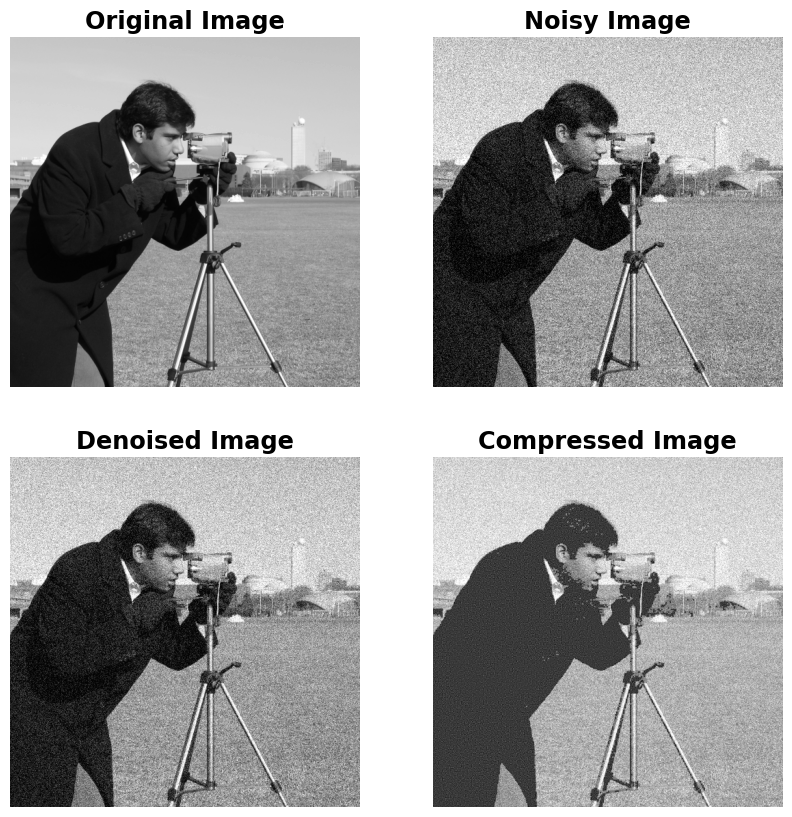

In [ ]:

coeffs = pywt.dwt2(noisy_image, 'haar')
cA, (cH, cV, cD) = coeffs

# Set a threshold to zero out small coefficients in the detail bands for denoising
threshold = 0.02
cH_denoised = np.where(np.abs(cH) > threshold, cH, 0)
cV_denoised = np.where(np.abs(cV) > threshold, cV, 0)
cD_denoised = np.where(np.abs(cD) > threshold, cD, 0)

# Reconstruct the image using the modified coefficients for denoising
denoised_image = pywt.idwt2((cA, (cH_denoised, cV_denoised, cD_denoised)), 'haar')

# Image compression by keeping top 70% coefficients
n_largest = int(len(cA.flatten()) * 0.7)
largest_indices = np.argpartition(cA.flatten(), -n_largest)[-n_largest:]
compressed_cA = np.zeros_like(cA.flatten())
compressed_cA[largest_indices] = cA.flatten()[largest_indices]
compressed_cA = compressed_cA.reshape(cA.shape)

# Reconstruct the image from the compressed approximation coefficients
compressed_image = pywt.idwt2((compressed_cA, (cH_denoised, cV_denoised, cD_denoised)), 'haar')

# Plot the original, noisy, denoised, and compressed images
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

axs[0, 0].imshow(image, cmap='gray')
axs[0, 0].set_title('Original Image')
axs[0, 0].axis('off')

axs[0, 1].imshow(noisy_image, cmap='gray')
axs[0, 1].set_title('Noisy Image')
axs[0, 1].axis('off')

axs[1, 0].imshow(denoised_image, cmap='gray')
axs[1, 0].set_title('Denoised Image')
axs[1, 0].axis('off')

axs[1, 1].imshow(compressed_image, cmap='gray')
axs[1, 1].set_title('Compressed Image')
axs[1, 1].axis('off')

plt.show()
